## **blinkit analysis python project**

#### **importing libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### **importing data**

In [2]:
df=pd.read_csv("C:/Users/Kalpesh Kad/Desktop/data analytics projects/capstone project(sql+python+power bi+excel)/BlinkIT Grocery Data.csv")

In [3]:
df.head(10)

,Item Fat Content,Item Identifier,Item Type,Outlet Establishment Year,Outlet Identifier,Outlet Location Type,Outlet Size,Outlet Type,Item Visibility,Item Weight,Total Sales,Rating
0,Regular,FDX32,Fruits and Vegetables,2012,OUT049,Tier 1,Medium,Supermarket Type1,0.100014,15.10,145.4786,5.0
1,Low Fat,NCB42,Health and Hygiene,2022,OUT018,Tier 3,Medium,Supermarket Type2,0.008596,11.80,115.3492,5.0
2,Regular,FDR28,Frozen Foods,2010,OUT046,Tier 1,Small,Supermarket Type1,0.025896,13.85,165.0210,5.0
3,Regular,FDL50,Canned,2000,OUT013,Tier 3,High,Supermarket Type1,0.042278,12.15,126.5046,5.0
4,Low Fat,DRI25,Soft Drinks,2015,OUT045,Tier 2,Small,Supermarket Type1,0.033970,19.60,55.1614,5.0
5,low fat,FDS52,Frozen Foods,2020,OUT017,Tier 2,Small,Supermarket Type1,0.005505,8.89,102.4016,5.0
6,Low Fat,NCU05,Health and Hygiene,2011,OUT010,Tier 3,Small,Grocery Store,0.098312,11.80,81.4618,5.0
7,Low Fat,NCD30,Household,2015,OUT045,Tier 2,Small,Supermarket Type1,0.026904,19.70,96.0726,5.0
8,Low Fat,FDW20,Fruits and Vegetables,2000,OUT013,Tier 3,High,Supermarket Type1,0.024129,20.75,124.1730,5.0
9,Low Fat,FDX25,Canned,1998,OUT027,Tier 3,Medium,Supermarket Type3,0.101562,NaN,181.9292,5.0


In [4]:
df.shape

(8523, 12)

#### **size of the data**

In [5]:
print("size of data",df.shape)

size of data (8523, 12)


#### **field information**

In [6]:
df.columns

Index(['Item Fat Content', 'Item Identifier', 'Item Type',
       'Outlet Establishment Year', 'Outlet Identifier',
       'Outlet Location Type', 'Outlet Size', 'Outlet Type', 'Item Visibility',
       'Item Weight', 'Total Sales', 'Rating'],
      dtype='object')

#### **data types of columns**

In [7]:
df.dtypes

Item Fat Content              object
Item Identifier               object
Item Type                     object
Outlet Establishment Year      int64
Outlet Identifier             object
Outlet Location Type          object
Outlet Size                   object
Outlet Type                   object
Item Visibility              float64
Item Weight                  float64
Total Sales                  float64
Rating                       float64
dtype: object

### **cleaning data**

In [8]:
print(df['Item Fat Content'].unique())

['Regular' 'Low Fat' 'low fat' 'LF' 'reg']


#*now convert 'low fat' and 'LF' to 'Low Fat' as they are same*

In [9]:
df['Item Fat Content']=df['Item Fat Content'].replace({'low fat':'Low Fat','LF':'Low Fat','reg':'Regular'})

In [10]:
print(df['Item Fat Content'].unique())

['Regular' 'Low Fat']


### **KPI's Requirements**

In [11]:
#Total Sales
total_sales=df['Total Sales'].sum()

#Average Sales
avg_sales=df['Total Sales'].mean()

#No of items sold
no_of_items_sold=df['Total Sales'].count()

#Average Ratings
avg_ratings=df['Rating'].mean()

#to display
print(f"Total Sales:${total_sales:,.1f}")
print(f"Average Sales:${avg_sales:,.1f}")
print(f"No of Items Sold:{no_of_items_sold:,.1f}")
print(f"Average Ratings:{avg_ratings:,.1f}")

Total Sales:$1,201,681.5
Average Sales:$141.0
No of Items Sold:8,523.0
Average Ratings:4.0


In [12]:
#Total Sales
total_sales=df['Total Sales'].sum()

#Average Sales
avg_sales=df['Total Sales'].mean()

#No of items sold
no_of_items_sold=df['Total Sales'].count()

#Average Ratings
avg_ratings=df['Rating'].mean()

#to display
print(f"Total Sales:${total_sales:,.0f}")
print(f"Average Sales:${avg_sales:,.0f}")
print(f"No of Items Sold:{no_of_items_sold:,.0f}")
print(f"Average Ratings:{avg_ratings:,.1f}")

Total Sales:$1,201,681
Average Sales:$141
No of Items Sold:8,523
Average Ratings:4.0


### **Charts Requirements**

##### **1)Total Sales by Fat Content**

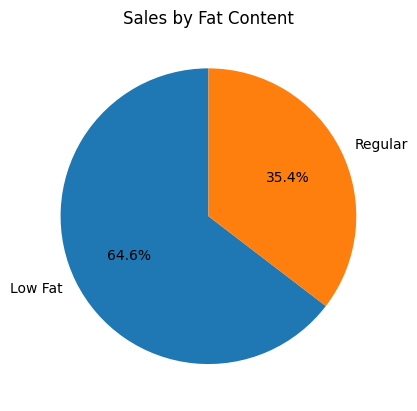

In [13]:
sales_by_fat=df.groupby('Item Fat Content')['Total Sales'].sum()
plt.pie(sales_by_fat,labels=sales_by_fat.index,autopct='%.1f%%',startangle=90)
plt.title('Sales by Fat Content')
plt.show()

##### **2) Total Sales by Item Type**

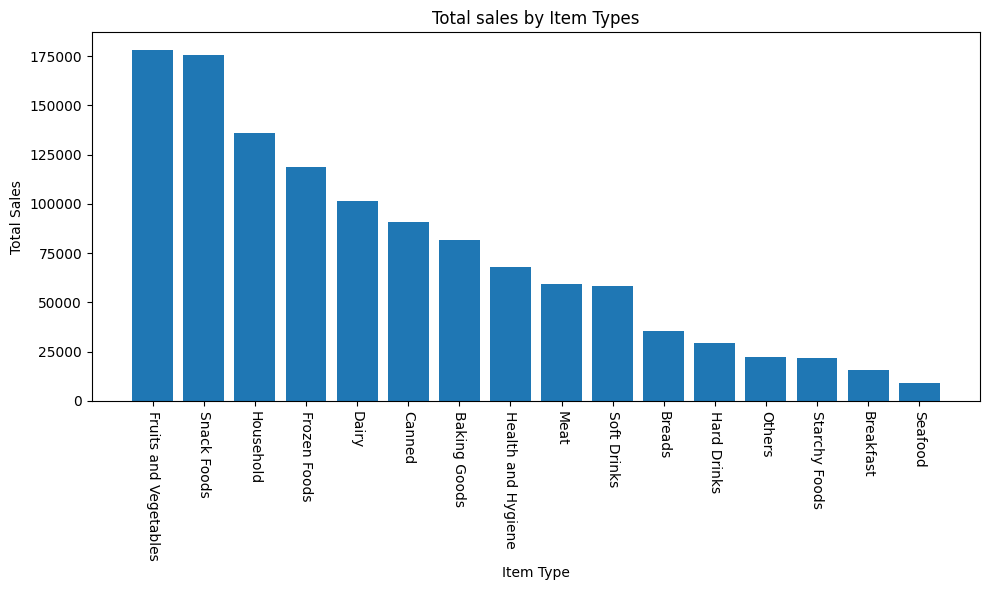

In [15]:
sales_by_type=df.groupby('Item Type')['Total Sales'].sum().sort_values(ascending=False)

plt.figure(figsize=(10,6))
bars=plt.bar(sales_by_type.index,sales_by_type.values) # (x,y) axis

plt.xticks(rotation=-90) # xticks are the names of all Item Type.And -90 means names are vertical
plt.xlabel('Item Type')
plt.ylabel('Total Sales')
plt.title('Total sales by Item Types')



plt.tight_layout()
plt.show()

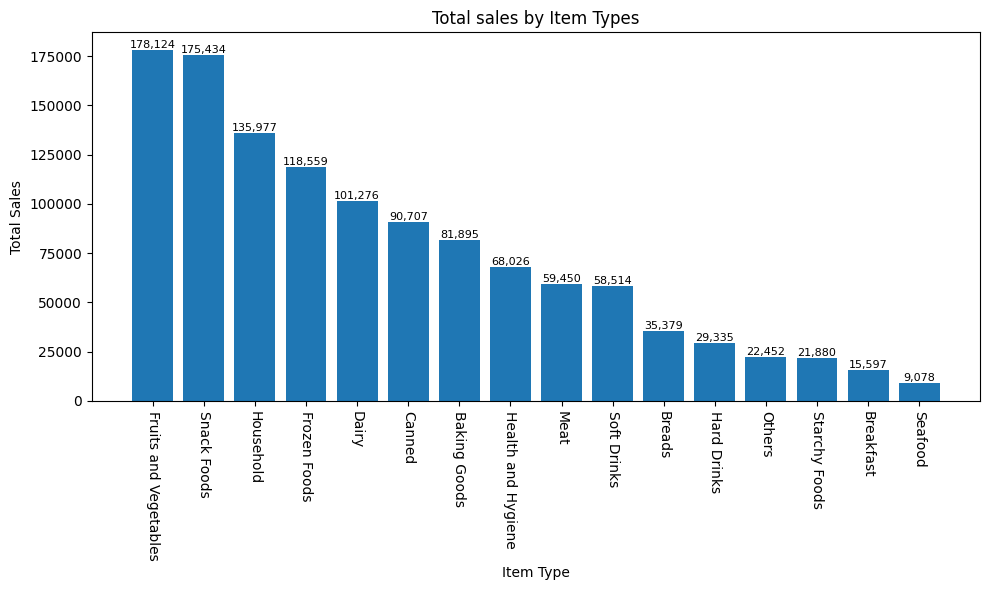

In [14]:
sales_by_type=df.groupby('Item Type')['Total Sales'].sum().sort_values(ascending=False)

plt.figure(figsize=(10,6))
bars=plt.bar(sales_by_type.index,sales_by_type.values) # (x,y) axis

plt.xticks(rotation=-90) # xticks are the names of all Item Type.And -90 means names are vertical
plt.xlabel('Item Type')
plt.ylabel('Total Sales')
plt.title('Total sales by Item Types')

# this is used to give values on the bars
for bar in bars:
    plt.text(bar.get_x() + bar.get_width() / 2,bar.get_height(),f'{bar.get_height():,.0f}',ha='center',va='bottom',fontsize=8)

plt.tight_layout()
plt.show()


##### **3) Fat content by outlet for total sales**

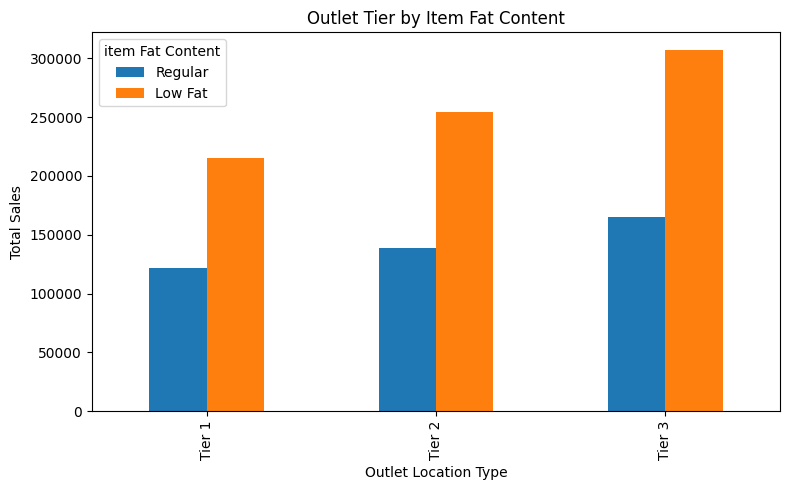

In [17]:
grouped=df.groupby(['Outlet Location Type','Item Fat Content'])['Total Sales'].sum().unstack()# unstack is used to prevent overlapping of two bars
grouped=grouped[['Regular','Low Fat']]

ax=grouped.plot(kind='bar',figsize=(8,5),title='Outlet Tier by Item Fat Content')
plt.xlabel('Outlet Location Type')
plt.ylabel('Total Sales')
plt.legend(title='item Fat Content')
plt.tight_layout()
plt.show()

##### **4) Total Sales By Outlet Establishment**

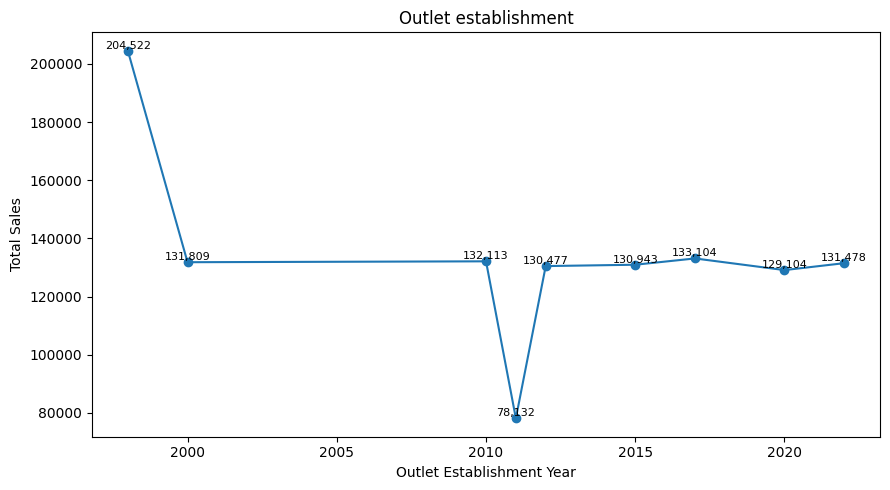

In [18]:
sales_by_year=df.groupby('Outlet Establishment Year')['Total Sales'].sum().sort_index() # groupby is used because we are using aggregation function that is (sum)

plt.figure(figsize=(9,5))
plt.plot(sales_by_year.index,sales_by_year.values,marker='o',linestyle='-')

plt.xlabel('Outlet Establishment Year')
plt.ylabel('Total Sales')
plt.title('Outlet establishment')

for x,y in zip(sales_by_year.index,sales_by_year.values):
    plt.text(x,y,f'{y:,.0f}',ha='center',va='bottom',fontsize=8)

plt.tight_layout()
plt.show()

##### **5) sales by outlet size**

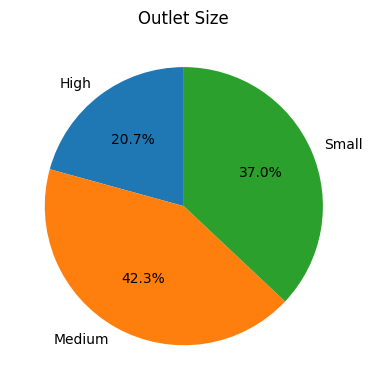

In [20]:
sales_by_size=df.groupby('Outlet Size')['Total Sales'].sum()

plt.figure(figsize=(4,4))
plt.pie(sales_by_size,labels=sales_by_size.index,autopct='%1.1f%%',startangle=90)
plt.title('Outlet Size')
plt.tight_layout() #whenever we are giving figuresize to chart then tight_layout should be given to prevent scattering and overlapping
plt.show()

##### **6)sales by outlet location**

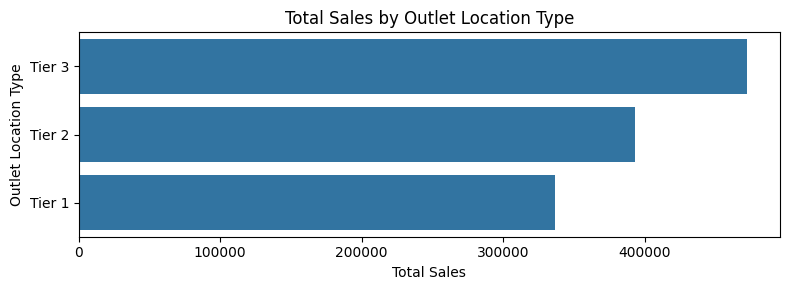

In [26]:
sales_by_location=df.groupby('Outlet Location Type')['Total Sales'].sum().reset_index()
sales_by_location=sales_by_location.sort_values('Total Sales',ascending=False)

plt.figure(figsize=(8,3))
ax=sns.barplot(x='Total Sales',y='Outlet Location Type',data=sales_by_location)

plt.title('Total Sales by Outlet Location Type')
plt.xlabel('Total Sales')
plt.ylabel('Outlet Location Type')

plt.tight_layout()
plt.show()